In [45]:
import json
import seaborn as sns
import spacy
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('../results/output.jsonl') as f:
    items = [
        item
        for line in f
        for item in json.loads(line)
    ]

In [5]:
nlp = spacy.load('en_core_web_lg')

In [35]:
def ignore_token(token):
    return (
        token.is_bracket or
        token.is_currency or
        token.is_left_punct or
        token.is_right_punct or
        token.is_punct or
        token.is_space or
        token.is_stop
    )

In [40]:
def count_tokens(text):
    doc = nlp(text, disable=[
        'tagger',
        'parser',
        'ner',
        'attribute_ruler',
        'lemmatizer',
    ])
    
    return len(doc)

def count_chars(text):
    return len(text)

In [41]:
token_sizes = []
char_sizes = []

for item in tqdm(items):
    text = item['snippet']['text']
    
    token_sizes.append(count_tokens(text))
    char_sizes.append(count_chars(text))

  0%|          | 0/73641 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

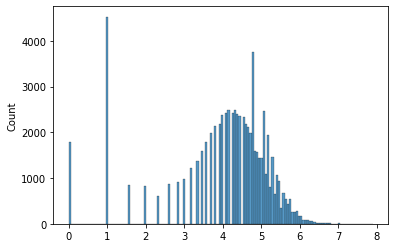

In [47]:
sns.histplot(np.log2(token_sizes))

#plt.gca().set(xscale='log')

Anything with less than $2^3=8$ tokens, as defined by nlp, will not be considered. They seem to be flukes.

<AxesSubplot:ylabel='Count'>

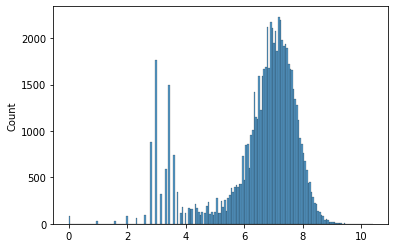

In [48]:
sns.histplot(np.log2(char_sizes))

Anything will less than $2^4=16$ characters will also not be considered